# Training a Simple CNN

In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from data.image_dataset import ImageDataset
from training.cnn import CNN
from training.train import *
from training.eval import *
from data.convert_labels import *
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
train_dir_path = 'data/real/01_20_160_120/train'
train_annotations_file_path = f'{train_dir_path}/01_20_160_120_train.csv'
test_dir_path = 'data/real/01_20_160_120/test'
test_annotations_file_path = f'{test_dir_path}/01_20_160_120_test.csv'

# Can override arguments specifying class boundaries
target_transform = lambda target: convert_labels(target)

train_val_dataset = ImageDataset(
  annotations_file=train_annotations_file_path,
  img_dir=train_dir_path,
  transform=None,
  target_transform=target_transform
)
test_dataset = ImageDataset(
  annotations_file=test_annotations_file_path,
  img_dir=test_dir_path,
  transform=None,
  target_transform=target_transform
)

generator = torch.Generator().manual_seed(0)
train_dataset, val_dataset = random_split(train_val_dataset, [0.9, 0.1], generator=generator)

In [19]:
# Create Dataloader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# train_features, train_labels = next(iter(train_loader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# print(np.unique(train_labels))

In [20]:
model = CNN(input_dims=(160, 120))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

results = train(model, criterion, optimizer, train_loader, val_loader, epochs=10)

| epoch  1 | train acc 0.253593 | valid acc 0.236641 |
| epoch  2 | train acc 0.760778 | valid acc 0.763359 |
| epoch  3 | train acc 0.902790 | valid acc 0.923664 |
| epoch  4 | train acc 0.923077 | valid acc 0.908397 |
| epoch  5 | train acc 0.934066 | valid acc 0.954198 |
| epoch  6 | train acc 0.977177 | valid acc 0.977099 |
| epoch  7 | train acc 0.981403 | valid acc 0.992366 |
| epoch  8 | train acc 0.991547 | valid acc 0.984733 |
| epoch  9 | train acc 0.987320 | valid acc 0.969466 |
| epoch 10 | train acc 0.985630 | valid acc 0.969466 |


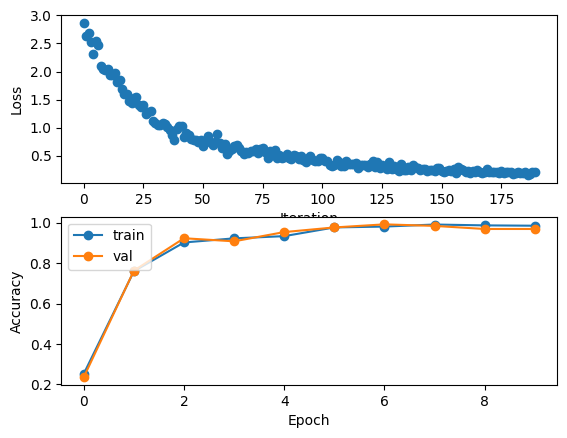

In [21]:
loss_history, train_acc_history, val_acc_history = results
plt.subplot(2, 1, 1)
plt.plot(loss_history, 'o')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_history, '-o')
plt.plot(val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [22]:
test_acc = evaluate_acc(model, test_loader)
print(test_acc)

tensor(0.4196)
